In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.io as pio
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
path = '/home/lorenzo/Principal/Noise-Neuron discriminator/Datos/'
data = pd.read_pickle(path + 'PCCIBbMZASDPCInb')
data = data.drop(columns = ['Bulk'])
df = data.copy()
df = df.drop(df.index[df.bNoise.isna()])
df.bNoise = df.bNoise.astype(int)

In [3]:
df.columns

Index(['PatientExperiment', 'Channel', 'Cluster', 'ISI', 'bNoise', 'Mean',
       'ZeroCrossings', 'Amplitude', 'Amplitude_peaktopeak', 'MeanSTD',
       'derivative_peak', 'derivative_max', 'power_processing', 'Counts',
       'ISI_noisy_band'],
      dtype='object')

## Nearest_Neighbours

## Caso Simple

In [28]:
X = df[["Counts","ZeroCrossings","ISI_noisy_band","Amplitude_peaktopeak","power_processing"]]
y = df.bNoise

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

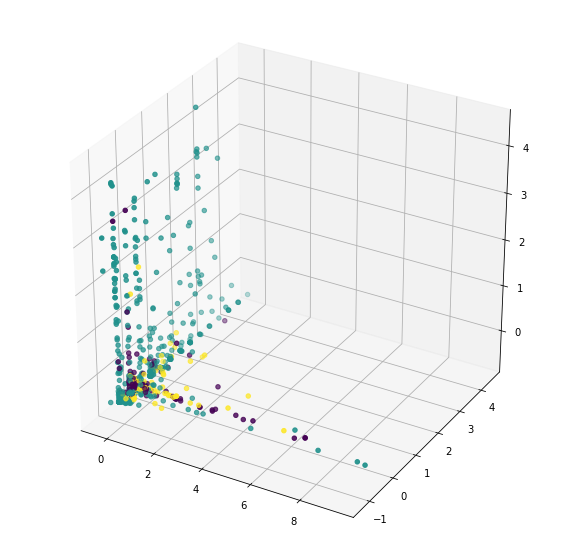

In [30]:
fig= plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = "3d")
ax.scatter(X_train.T[0],X_train.T[1],X_train.T[2],c = y_train.values)
#y_train.values

### Train and Test

Text(0.5, 0, 'n')

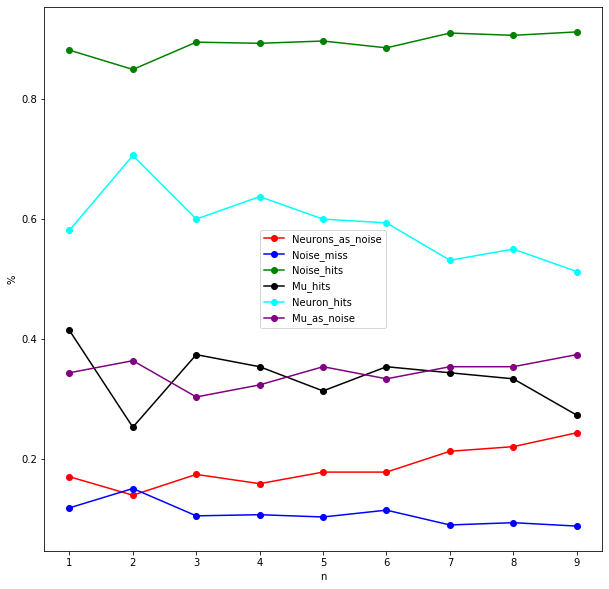

In [31]:
Neurons_as_noise_list = []
Noise_misses_list = []
Noise_hits_list = []
Mu_hits_list = []
Neurons_hits_list = []
Mu_as_noise_list = []
for i in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    conf_m = confusion_matrix(y_test, y_pred)
    Noise_misses = conf_m[1][0] + conf_m[1][2]
    Mu_as_noise = conf_m[2][1]
    Noise_hits = conf_m[1][1]
    Neuron_as_noise = conf_m[0][1]
    Neuron_hits = conf_m[0][0]
    Mu_hits = conf_m[2][2]
    
    Neurons_as_noise_list.append(Neuron_as_noise)
    Mu_as_noise_list.append(Mu_as_noise)
    Noise_misses_list.append(Noise_misses)
    Noise_hits_list.append(Noise_hits)
    Mu_hits_list.append(Mu_hits)
    Neurons_hits_list.append(Neuron_hits)

    
fig = plt.figure(figsize = (10,10))
plt.plot(np.arange(1,len(Neurons_as_noise_list)+1),np.array(Neurons_as_noise_list)/(np.sum(conf_m[0])+np.sum(conf_m[2])),
         'o-',c = 'red',label = 'Neurons_as_noise')

plt.plot(np.arange(1,len(Noise_misses_list)+1),np.array(Noise_misses_list)/(np.sum(conf_m[1])),'o-',c = 'blue',
        label = 'Noise_miss')

plt.plot(np.arange(1,len(Noise_hits_list)+1),np.array(Noise_hits_list)/(np.sum(conf_m[1])),'o-',c = 'green',
        label = 'Noise_hits')

plt.plot(np.arange(1,len(Mu_hits_list)+1),np.array(Mu_hits_list)/(np.sum(conf_m[2])),'o-',c = 'black',
        label = 'Mu_hits')

plt.plot(np.arange(1,len(Neurons_hits_list)+1),np.array(Neurons_hits_list)/(np.sum(conf_m[0])),'o-',c = 'cyan',
        label = 'Neuron_hits')

plt.plot(np.arange(1,len(Mu_as_noise_list)+1),np.array(Mu_as_noise_list)/(np.sum(conf_m[2])),'o-',c = 'purple',
        label = 'Mu_as_noise')

counts = pd.DataFrame({'a':y_test})
counts = counts.a.value_counts().values

plt.legend()
plt.ylabel('%')
plt.xlabel('n')

 

In [121]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 75  55  28]
 [ 48 452   9]
 [ 47  43  28]]
              precision    recall  f1-score   support

           0       0.44      0.47      0.46       158
           1       0.82      0.89      0.85       509
           2       0.43      0.24      0.31       118

    accuracy                           0.71       785
   macro avg       0.56      0.53      0.54       785
weighted avg       0.69      0.71      0.69       785



### Estadistica

In [75]:
log = {0:[],1:[],2:[]}
for j in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    counts = pd.DataFrame({'a':y_test})
    counts = counts.a.value_counts().values #counts[0] = len(y_train.bNoise == 1)
    
    Neurons_as_noise_list = []
    Noise_as_neurons_list = []
    Noise_found_list = []   
    for i in range(1,10):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
    
        
        y_pred = classifier.predict(X_test)
        conf_m = confusion_matrix(y_test, y_pred)
        Neuron_as_noise = conf_m[0][1]+ conf_m[2][1]
        Noise_as_neurons = conf_m[1][0] + conf_m[1][2]
        Noise_found = conf_m[1][1]
        Neurons_as_noise_list.append(Neuron_as_noise/(counts[1] + counts[2]))
        Noise_as_neurons_list.append(Noise_as_neurons/np.sum(counts[0]))
        Noise_found_list.append(Noise_found/np.sum(counts[0]))
                                     
    log[0].append(Neurons_as_noise_list)
    log[1].append(Noise_as_neurons_list)
    log[2].append(Noise_found_list)



In [76]:
Neurons_as_noise_mean = np.mean(log[0],axis = 0)
Neurons_as_noise_std = np.std(log[0],axis = 0)

Noise_as_neurons_mean = np.mean(log[1],axis = 0)
Noise_as_neurons_std = np.std(log[1],axis = 0)

Noise_found_mean = np.mean(log[2],axis = 0)
Noise_found_std = np.std(log[2],axis = 0)

<IPython.core.display.Javascript object>


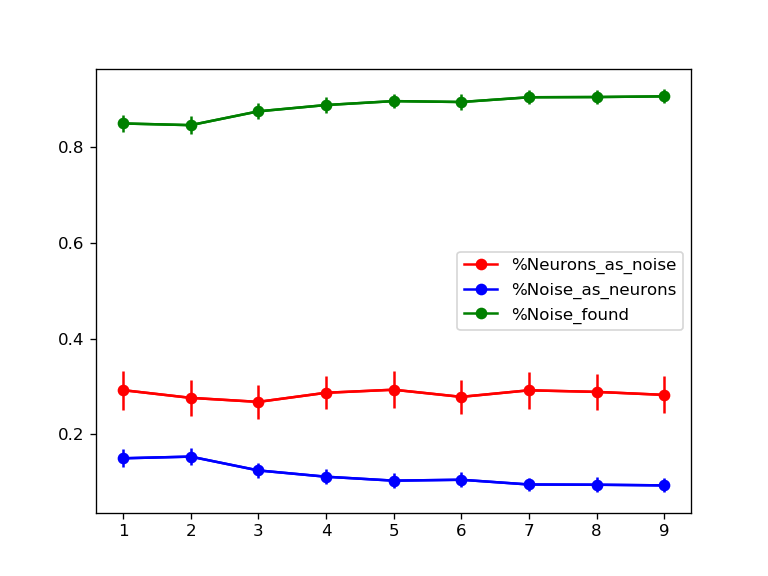

In [77]:
fig = plt.figure()
ax = fig.subplots(1)
ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Neurons_as_noise_mean,'o-',c = 'red',label = '%Neurons_as_noise')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Neurons_as_noise_mean, yerr = Neurons_as_noise_std,color = 'red')

ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Noise_as_neurons_mean,'o-',c = 'blue',label = '%Noise_as_neurons')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Noise_as_neurons_mean, yerr = Noise_as_neurons_std,color = 'blue')

ax.plot(np.arange(1,len(Neurons_as_noise_mean)+1),Noise_found_mean,'o-',c = 'green',label = '%Noise_found')
ax.errorbar(x = np.arange(1,len(Neurons_as_noise_mean) + 1),y = Noise_found_mean, yerr = Noise_found_std,color = 'green')

ax.legend()

In [157]:
np.arange(3,len(Neurons_as_noise_mean)+3)

array([3])

In [156]:
len(Neurons_as_noise_mean)

1

In [32]:
y_train

108     1
761     0
1092    2
869     1
455     0
       ..
848     1
608     1
215     0
1416    1
1550    1
Name: bNoise, Length: 785, dtype: int64